In [35]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans



!conda install -c conda-forge folium=0.5.0 --yes 
# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.




## Data Understanding and Preparation

In [36]:
#sf_df = pd.read_csv('SF_Inspect.csv')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d6fa5e4b6ef747ca856b6885f881c8d4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='c6PBI9hwFokyenNvL6e50zfd3vL7qYHhZzLpudyQoVL2',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_d6fa5e4b6ef747ca856b6885f881c8d4.get_object(Bucket='courserafinal-donotdelete-pr-kgani916gaefdq',Key='SF_Inspect.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
sf_df = pd.read_csv(body)
sf_df.head()


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,101192_20190606,06/06/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,07/25/2019 12:00:00 AM,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,92982_20170912,09/12/2017 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,101389_20190625,06/25/2019 12:00:00 AM,NaN,New Construction,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,85986_20161011,10/11/2016 12:00:00 AM,NaN,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk


In [37]:
sf_df.shape

(53973, 17)

In [38]:
copy_sf_df = sf_df
copy_sf_df.head(7)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,101192_20190606,06/06/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,97975_20190725,07/25/2019 12:00:00 AM,96.0,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,92982_20170912,09/12/2017 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,101389_20190625,06/25/2019 12:00:00 AM,NaN,New Construction,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,85986_20161011,10/11/2016 12:00:00 AM,NaN,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk
5,98974,Brickhouse,426 BRANNAN ST,San Francisco,CA,94107,NaN,NaN,NaN,1.415839e+10,98974_20190321,03/21/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN
6,99342,LAI HONG RESTAURANT,1416 POWELL ST,San Francisco,CA,94133,NaN,NaN,NaN,NaN,99342_20190222,02/22/2019 12:00:00 AM,NaN,New Ownership,NaN,NaN,NaN


In [39]:
copy_sf_df.dropna(subset=['business_id','business_name',
                          'business_address','business_city','business_state',
                          'business_postal_code','business_latitude','business_longitude',
                          'business_location','business_phone_number','inspection_id',
                          'inspection_id','inspection_date','inspection_score','inspection_type',
                          'violation_id','violation_description'],inplace=True)

In [40]:

df_risk = copy_sf_df.groupby('risk_category', axis=0).count()
df_risk.head(10)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description
risk_category,,,,,,,,,,,,,,,,
High Risk,735,735,735,735,735,735,735,735,735,735,735,735,735,735,735,735
Low Risk,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538,2538
Moderate Risk,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942


In [41]:
df_risk_score = copy_sf_df.groupby('risk_category', axis=0)['inspection_score'].mean()
df_risk_score.head(10)

risk_category
High Risk        81.008163
Low Risk         87.345154
Moderate Risk    85.187436
Name: inspection_score, dtype: float64

In [42]:

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


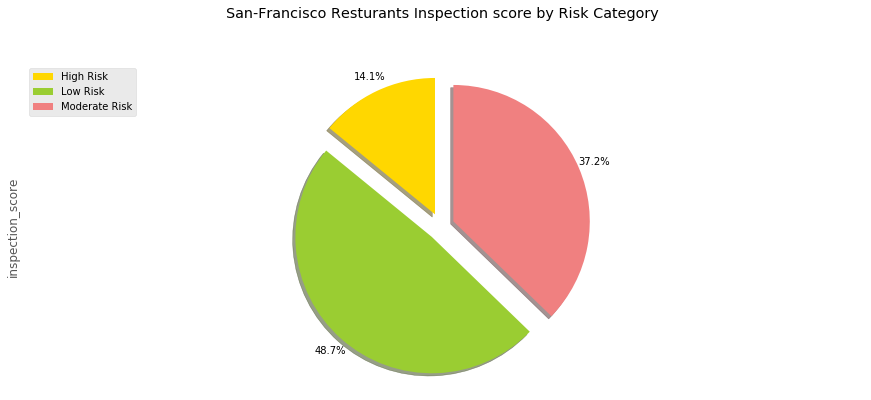

In [43]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_risk['inspection_score'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('San-Francisco Resturants Inspection score by Risk Category', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_risk.index, loc='upper left') 

plt.show()

In [44]:
def getMonth(s):
    return s.split("/")[0]

def getDay(s):
    return s.split("/")[1]

def getYear(s):
     ss= s.split("/")[2]
     return ss[:4]

def getYearMonth(s):
    return s.split("/")[1]+"/"+s.split("/")[2]

In [45]:
copy_sf_df['year']= copy_sf_df['inspection_date'].apply(lambda x: getYear(str(x)))
copy_sf_df['Month']= copy_sf_df['inspection_date'].apply(lambda x: getMonth(str(x)))
copy_sf_df['day']= copy_sf_df['inspection_date'].apply(lambda x: getDay(str(x)))
copy_sf_df.head(10)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day
11,4794,VICTOR'S,210 TOWNSEND St,San Francisco,CA,94107,37.778634,-122.393089,POINT (-122.393089 37.778634),1.415561e+10,4794_20181030,10/30/2018 12:00:00 AM,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,2018,10,30
172,63652,SFDH - Banquet Main Kitchen,450 Powell St 2nd Floor,San Francisco,CA,94102,37.788918,-122.408507,POINT (-122.408507 37.788918),1.415540e+10,63652_20190904,09/04/2019 12:00:00 AM,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,2019,09,04
327,328,Miyako,1470 Fillmore St,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,2016,11,22
372,2684,ERIC'S RESTAURANT,1500 Church St,San Francisco,CA,94131,37.746759,-122.426995,POINT (-122.426995 37.746759),1.415528e+10,2684_20190715,07/15/2019 12:00:00 AM,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,2019,07,15
397,328,Miyako,1470 Fillmore St,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2016,11,22
464,3256,"Connection, The",5740 MISSION St,San Francisco,CA,94112,37.709737,-122.450070,POINT (-122.45007 37.709737),1.415534e+10,3256_20190604,06/04/2019 12:00:00 AM,94.0,Routine - Unscheduled,3256_20190604_103154,Unclean or degraded floors walls or ceilings,Low Risk,2019,06,04
484,3951,KIRIN RESTAURANT,6135 GEARY Blvd,San Francisco,CA,94121,37.779962,-122.485087,POINT (-122.485087 37.779962),1.415539e+10,3951_20190729,07/29/2019 12:00:00 AM,77.0,Routine - Unscheduled,3951_20190729_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2019,07,29
496,4864,DRAGON CITY BAKERY & CAFE,2367 MISSION St,San Francisco,CA,94110,37.759174,-122.419066,POINT (-122.419066 37.759174),1.415583e+10,4864_20190708,07/08/2019 12:00:00 AM,78.0,Routine - Unscheduled,4864_20190708_103144,Unapproved or unmaintained equipment or utensils,Low Risk,2019,07,08
498,3165,HAN IL KWAN,1802 BALBOA St,San Francisco,CA,94121,37.776599,-122.478292,POINT (-122.478292 37.776599),1.415360e+10,3165_20190604,06/04/2019 12:00:00 AM,85.0,Routine - Unscheduled,3165_20190604_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,2019,06,04
503,65051,Mission Cheese,736 Valencia St,San Francisco,CA,94110,37.761147,-122.421534,POINT (-122.421534 37.761147),1.415556e+10,65051_20190529,05/29/2019 12:00:00 AM,90.0,Routine - Unscheduled,65051_20190529_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,2019,05,29


In [46]:
sf_df_year = copy_sf_df.groupby(['risk_category','year'])['inspection_score'].count()
sf_df_year.head(20)

risk_category  year
High Risk      2016     41
               2017    248
               2018    226
               2019    220
Low Risk       2016    201
               2017    851
               2018    789
               2019    697
Moderate Risk  2016    160
               2017    606
               2018    634
               2019    542
Name: inspection_score, dtype: int64

In [47]:
un_SF_df = sf_df_year.unstack()

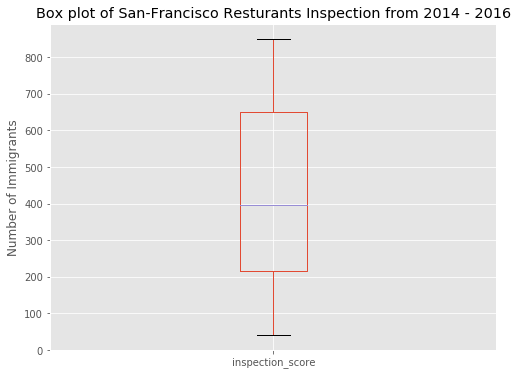

In [48]:
sf_df_year.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of San-Francisco Resturants Inspection from 2014 - 2016')
plt.ylabel('Number of Immigrants')

plt.show()

In [49]:

years = list(map(str, range(2014, 2016)))

sf_df_year.index

MultiIndex(levels=[['High Risk', 'Low Risk', 'Moderate Risk'], ['2016', '2017', '2018', '2019']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['risk_category', 'year'])

In [50]:
df_gptest = copy_sf_df[['risk_category','year','inspection_score']]
df_risk_year = df_gptest.groupby(['risk_category','year'],as_index= False).count()
df_risk_year

,risk_category,year,inspection_score
0,High Risk,2016,41
1,High Risk,2017,248
2,High Risk,2018,226
3,High Risk,2019,220
4,Low Risk,2016,201
5,Low Risk,2017,851
6,Low Risk,2018,789
7,Low Risk,2019,697
8,Moderate Risk,2016,160
9,Moderate Risk,2017,606


In [51]:
all(isinstance(column, str) for column in df_risk_year.columns)

True

# We groupd the inspections by year for each category low,moderate and high

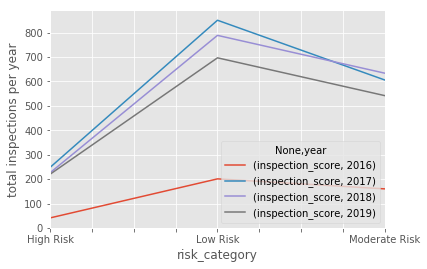

In [52]:
grouped_pivot = df_risk_year.pivot(index='risk_category',columns='year').plot()

plt.ylabel('total inspections per year');

In [53]:

import seaborn as sns
import re

In [54]:
new_SF_df = copy_sf_df
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\d+', '')
new_SF_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day
11,4794,VICTOR'S,TOWNSEND St,San Francisco,CA,94107,37.778634,-122.393089,POINT (-122.393089 37.778634),1.415561e+10,4794_20181030,10/30/2018 12:00:00 AM,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,2018,10,30
172,63652,SFDH - Banquet Main Kitchen,Powell St nd Floor,San Francisco,CA,94102,37.788918,-122.408507,POINT (-122.408507 37.788918),1.415540e+10,63652_20190904,09/04/2019 12:00:00 AM,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,2019,09,04
327,328,Miyako,Fillmore St,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,2016,11,22
372,2684,ERIC'S RESTAURANT,Church St,San Francisco,CA,94131,37.746759,-122.426995,POINT (-122.426995 37.746759),1.415528e+10,2684_20190715,07/15/2019 12:00:00 AM,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,2019,07,15
397,328,Miyako,Fillmore St,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2016,11,22


In [55]:
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\sSt', '')
new_SF_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day
11,4794,VICTOR'S,TOWNSEND,San Francisco,CA,94107,37.778634,-122.393089,POINT (-122.393089 37.778634),1.415561e+10,4794_20181030,10/30/2018 12:00:00 AM,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,2018,10,30
172,63652,SFDH - Banquet Main Kitchen,Powell nd Floor,San Francisco,CA,94102,37.788918,-122.408507,POINT (-122.408507 37.788918),1.415540e+10,63652_20190904,09/04/2019 12:00:00 AM,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,2019,09,04
327,328,Miyako,Fillmore,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,2016,11,22
372,2684,ERIC'S RESTAURANT,Church,San Francisco,CA,94131,37.746759,-122.426995,POINT (-122.426995 37.746759),1.415528e+10,2684_20190715,07/15/2019 12:00:00 AM,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,2019,07,15
397,328,Miyako,Fillmore,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2016,11,22


In [56]:
new_SF_df['business_address'] = new_SF_df['business_address'].str.replace('\sSt', '')
new_SF_df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day
11,4794,VICTOR'S,TOWNSEND,San Francisco,CA,94107,37.778634,-122.393089,POINT (-122.393089 37.778634),1.415561e+10,4794_20181030,10/30/2018 12:00:00 AM,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,2018,10,30
172,63652,SFDH - Banquet Main Kitchen,Powell nd Floor,San Francisco,CA,94102,37.788918,-122.408507,POINT (-122.408507 37.788918),1.415540e+10,63652_20190904,09/04/2019 12:00:00 AM,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,2019,09,04
327,328,Miyako,Fillmore,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,2016,11,22
372,2684,ERIC'S RESTAURANT,Church,San Francisco,CA,94131,37.746759,-122.426995,POINT (-122.426995 37.746759),1.415528e+10,2684_20190715,07/15/2019 12:00:00 AM,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,2019,07,15
397,328,Miyako,Fillmore,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,11/22/2016 12:00:00 AM,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2016,11,22


In [57]:
new_SF_df.Month = new_SF_df.Month.astype(np.int64)
new_SF_df.day = new_SF_df.day.astype(np.int64)

In [58]:
ins_count = new_SF_df.groupby('business_postal_code').count()
ins_count

,business_id,business_name,business_address,business_city,business_state,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day
business_postal_code,,,,,,,,,,,,,,,,,,,
92672,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
941,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
94102,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
94103,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578
94104,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
94105,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
94107,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
94108,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
94109,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233,233


In [59]:
df_all_year = un_SF_df.T
df_all_year

risk_category,High Risk,Low Risk,Moderate Risk
year,,,
2016,41,201,160
2017,248,851,606
2018,226,789,634
2019,220,697,542


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

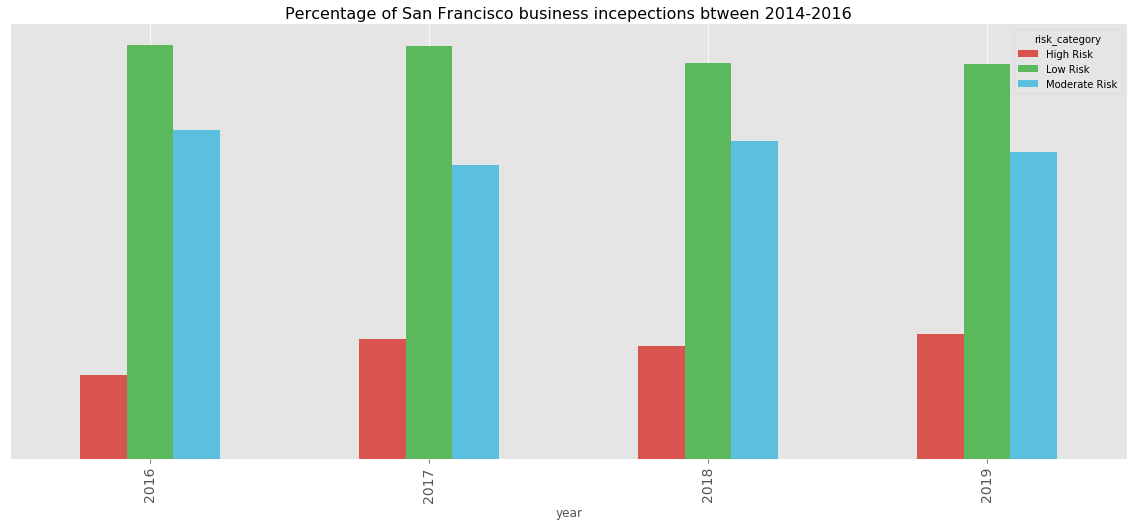

In [60]:

ax = df_all_year.div(df_all_year.sum(1), axis=0).plot(kind='bar', color=['#d9534f','#5cb85c', '#5bc0de' ], figsize=(20, 8))

ax.set_title("Percentage of San Francisco business incepections btween 2014-2016",fontsize=16)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
ax.set_xlabel(df_all_year)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.15*width, p.get_y() + height + 0.01))

In [61]:
sf_count= new_SF_df['business_postal_code'].value_counts().to_frame()
sf_count .rename(columns={'business_postal_code': 'Count'}, inplace=True)
sf_count.index.name ='business_postal_code'
sf_count.reset_index(level=0, inplace=True)
sf_count


,business_postal_code,Count
0,94110,1060
1,94103,578
2,94112,406
3,94115,307
4,94109,233
5,94123,232
6,94114,226
7,94132,222
8,94117,207
9,94102,185


In [62]:

!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

# All requested packages already installed.

Wordcloud is installed and imported!


In [63]:
stopwords = set(STOPWORDS)

In [64]:
lst_v_dsc = new_SF_df['violation_description'].tolist()

word_string = " ".join(str(s) for s in lst_v_dsc)

wordcloud = WordCloud(background_color='white', max_words=2000,stopwords=stopwords).generate(word_string)

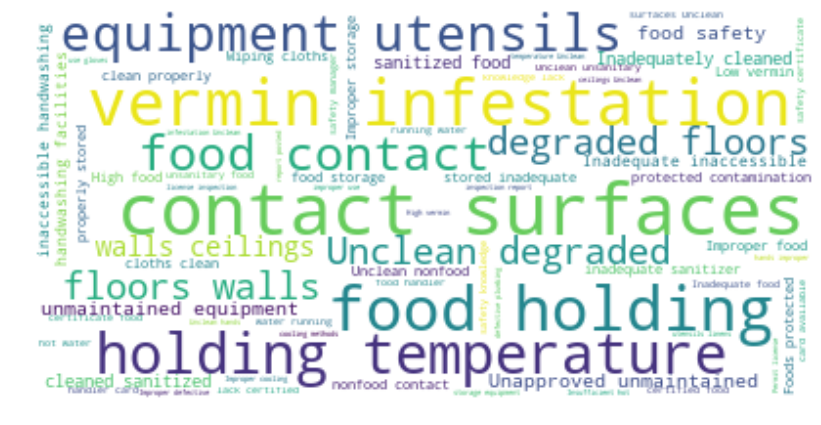

In [65]:
stopwords.add('Moderate risk') # add the words said to stopwords
stopwords.add('risk')
stopwords.add('Moderate')
# re-generate the word cloud
wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
sf_geo = client_d6fa5e4b6ef747ca856b6885f881c8d4.get_object(Bucket='courserafinal-donotdelete-pr-kgani916gaefdq', Key='Restaurant Scores - LIVES Standard.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(sf_geo, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 


In [69]:
threshold_scale = np.linspace(sf_count['Count'].min(),
                              sf_count['Count'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)
#sf_geo = r'san-francisco.json' # geojson file
sf_map.choropleth(
    geo_data = sf_geo,
    data = sf_count,
    columns =['business_postal_code', 'Count'],
    key_on ='feature.properties.DISTRICT',
    threshold_scale=[ 100, 200, 300, 500, 1000],
    fill_color ='BuPu', 
    fill_opacity =0.9, 
    line_opacity =0.9,
    legend_name ='Food inspection in San-Francisco',
    reset = True
)

# display map
sf_map

ValueError: Unhandled object <ibm_botocore.response.StreamingBody object at 0x7f3c29cf4240>.

In [70]:
new_SF_df.shape

(5215, 20)

In [71]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
new_SF_df_limt = new_SF_df.iloc[0:limit, :]
new_SF_df_limt.shape

(100, 20)

In [72]:
inspection = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(new_SF_df_limt.business_latitude, new_SF_df_limt.business_longitude):
    inspection.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(new_SF_df_limt.business_latitude)
longitudes = list(new_SF_df_limt.business_longitude)
labels = list(new_SF_df_limt.risk_category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sf_map)    
    
# add incidents to map
sf_map.add_child(inspection)

In [73]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
inspection = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(new_SF_df.business_latitude, new_SF_df.business_longitude, new_SF_df.risk_category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(inspection)

# display map
sanfran_map

NameError: name 'latitude' is not defined

# Modeling

In [74]:
new_SF_df['inspection_date'] = pd.to_datetime(new_SF_df['inspection_date'])

In [75]:
m_SF_df = new_SF_df.drop(columns=['business_location', 'business_phone_number', 'business_city' ,'business_state'])
m_SF_df.head(5)

,business_id,business_name,business_address,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day
11,4794,VICTOR'S,TOWNSEND,94107,37.778634,-122.393089,4794_20181030,2018-10-30,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,2018,10,30
172,63652,SFDH - Banquet Main Kitchen,Powell nd Floor,94102,37.788918,-122.408507,63652_20190904,2019-09-04,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,2019,9,4
327,328,Miyako,Fillmore,94115,37.783017,-122.432584,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,2016,11,22
372,2684,ERIC'S RESTAURANT,Church,94131,37.746759,-122.426995,2684_20190715,2019-07-15,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,2019,7,15
397,328,Miyako,Fillmore,94115,37.783017,-122.432584,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2016,11,22


In [76]:
m_SF_df['risk_category'].value_counts()

Low Risk         2538
Moderate Risk    1942
High Risk         735
Name: risk_category, dtype: int64

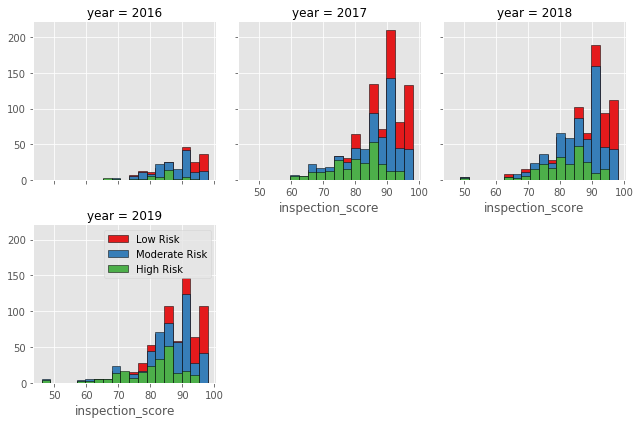

In [77]:
bins = np.linspace(m_SF_df.inspection_score.min(), m_SF_df.inspection_score.max(), 20)
g = sns.FacetGrid(m_SF_df, col="year", hue="risk_category", palette="Set1", col_wrap=3)
g.map(plt.hist, 'inspection_score', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

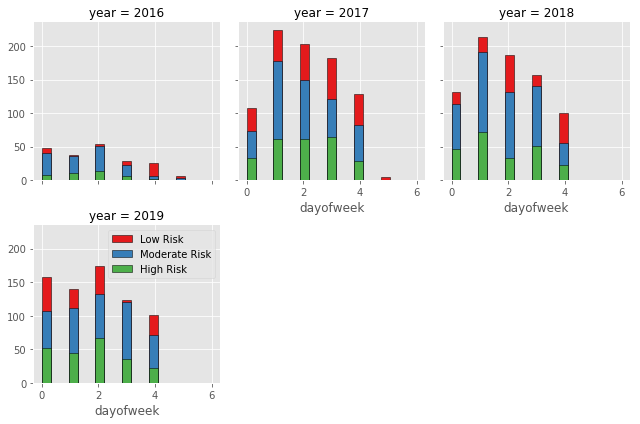

In [78]:
m_SF_df['dayofweek'] = m_SF_df['inspection_date'].dt.dayofweek
bins = np.linspace(m_SF_df.dayofweek.min(), m_SF_df.dayofweek.max(), 20)
g = sns.FacetGrid(m_SF_df, col="year", hue="risk_category", palette="Set1", col_wrap=3)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [79]:
m_SF_df['weekend'] = m_SF_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
m_SF_df.head()

,business_id,business_name,business_address,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day,dayofweek,weekend
11,4794,VICTOR'S,TOWNSEND,94107,37.778634,-122.393089,4794_20181030,2018-10-30,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,2018,10,30,1,0
172,63652,SFDH - Banquet Main Kitchen,Powell nd Floor,94102,37.788918,-122.408507,63652_20190904,2019-09-04,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,2019,9,4,2,0
327,328,Miyako,Fillmore,94115,37.783017,-122.432584,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,2016,11,22,1,0
372,2684,ERIC'S RESTAURANT,Church,94131,37.746759,-122.426995,2684_20190715,2019-07-15,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,2019,7,15,0,0
397,328,Miyako,Fillmore,94115,37.783017,-122.432584,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2016,11,22,1,0


# Convert Categorical features to numerical values

In [80]:
m_SF_df.groupby(['year'])['risk_category'].value_counts(normalize=True)

year  risk_category
2016  Low Risk         0.500000
      Moderate Risk    0.398010
      High Risk        0.101990
2017  Low Risk         0.499120
      Moderate Risk    0.355425
      High Risk        0.145455
2018  Low Risk         0.478472
      Moderate Risk    0.384475
      High Risk        0.137053
2019  Low Risk         0.477724
      Moderate Risk    0.371487
      High Risk        0.150788
Name: risk_category, dtype: float64

In [81]:
m_SF_df['risk_category'].replace(to_replace=['Low Risk','Moderate Risk','High Risk'], value=[1,2,3],inplace=True)
m_SF_df.head()

,business_id,business_name,business_address,business_postal_code,business_latitude,business_longitude,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day,dayofweek,weekend
11,4794,VICTOR'S,TOWNSEND,94107,37.778634,-122.393089,4794_20181030,2018-10-30,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,1,2018,10,30,1,0
172,63652,SFDH - Banquet Main Kitchen,Powell nd Floor,94102,37.788918,-122.408507,63652_20190904,2019-09-04,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,2,2019,9,4,2,0
327,328,Miyako,Fillmore,94115,37.783017,-122.432584,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,3,2016,11,22,1,0
372,2684,ERIC'S RESTAURANT,Church,94131,37.746759,-122.426995,2684_20190715,2019-07-15,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,3,2019,7,15,0,0
397,328,Miyako,Fillmore,94115,37.783017,-122.432584,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,1,2016,11,22,1,0


In [82]:
m_SF_df = m_SF_df.drop(columns=['day','Month','weekend'])

In [83]:
Feature = m_SF_df[['business_postal_code','business_latitude',
             'business_longitude','inspection_score',
              'year', 'dayofweek']]
my_features = Feature[Feature.business_postal_code.apply(lambda x: x.isnumeric())]
X = my_features
X[0:5]

,business_postal_code,business_latitude,business_longitude,inspection_score,year,dayofweek
11,94107,37.778634,-122.393089,71.0,2018,1
172,94102,37.788918,-122.408507,94.0,2019,2
327,94115,37.783017,-122.432584,81.0,2016,1
372,94131,37.746759,-122.426995,87.0,2019,0
397,94115,37.783017,-122.432584,81.0,2016,1


In [84]:
my_class_df = m_SF_df[m_SF_df.business_postal_code.apply(lambda x: x.isnumeric())]
y = my_class_df['risk_category'].values
y[0:5]

array([1, 2, 3, 3, 1])

# Classification
Now, it is time to use the training set to build an accurate model. Then use the test set to report the accuracy of the model You should use the following algorithm:

K Nearest Neighbor(KNN)
Logistic Regression
K Nearest Neighbor(KNN)
We should find the best k to build the model with the best accuracy.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4172, 6) (4172,)
Test set: (1043, 6) (1043,)


In [86]:
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc






print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.4573346116970278 with k= 2


In [87]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhatKNN = neigh.predict(X_test)
print("Train set Accuracy--> ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy -->", metrics.accuracy_score(y_test, yhatKNN))
print("F1  Accuracy -->", metrics.f1_score(y_test, yhatKNN, average='weighted'))

Train set Accuracy-->  0.5992329817833174
Test set Accuracy --> 0.43528283796740175
F1  Accuracy --> 0.39734525976561974


## Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [89]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [90]:
print("Train set Accuracy--> ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy -->", metrics.accuracy_score(y_test, yhatLR))

Train set Accuracy-->  0.49041227229146694
Test set Accuracy --> 0.47171620325982744


In [91]:
log_loss(y_test, yhat_prob)

0.9956890904501158

In [92]:
jaccard_similarity_score(y_test, yhatKNN)

0.43528283796740175

In [93]:
jaccard_similarity_score(y_test, yhatLR)

0.47171620325982744

In [94]:
#f1LR = f1_score(y, yhatLR, average='weighted')
print("Regression F1  Accuracy -->", metrics.f1_score(y_test, yhatLR, average='weighted'))

Regression F1  Accuracy --> 0.3023900612427819


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Using Fourquare to visualize businesses venues
We will make calls to the Foursquare API for different purposes. You will construct a URL to send a request to the API to search for a specific type of venues, to explore a particular business venue, to explore a Foursquare user, to explore a geographical location, and to get trending venues around a location. Also, you will learn how to use the visualization library, Folium, to visualize the results.

Import necessary Libraries
first we import some libraries that we need to complete our object effeciently

In [95]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## Define Foursquare Credentials
we define Foursquare Credentials and Version. We have already created a Foursquare developer account and have we credentials handy.

In [96]:
CLIENT_ID = 'EGJ4JLYHQDQDV05Y3AJB1CDSUBGWT1XURNJAWKVGFZYIZZRR' # your Foursquare ID
CLIENT_SECRET = '2BKSLK4VVRZGHP2HQ5TXQICQP13YK0E5ES3A3SZ3UGYPBAWY' # your Foursquare Secret
VERSION = '20181022'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EGJ4JLYHQDQDV05Y3AJB1CDSUBGWT1XURNJAWKVGFZYIZZRR
CLIENT_SECRET:2BKSLK4VVRZGHP2HQ5TXQICQP13YK0E5ES3A3SZ3UGYPBAWY


In [97]:
# get the first 100 inspections in the our dataframe
df_limit = 100
Top100_SF_df = sf_df.iloc[0:df_limit, :]
Top100_SF_df.shape

(100, 20)

In [98]:
Top100_SF_df.head(20)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,year,Month,day
11,4794,VICTOR'S,TOWNSEND,San Francisco,CA,94107,37.778634,-122.393089,POINT (-122.393089 37.778634),1.415561e+10,4794_20181030,2018-10-30,71.0,Routine - Unscheduled,4794_20181030_103138,Improper storage use or identification of toxi...,Low Risk,2018,10,30
172,63652,SFDH - Banquet Main Kitchen,Powell nd Floor,San Francisco,CA,94102,37.788918,-122.408507,POINT (-122.408507 37.788918),1.415540e+10,63652_20190904,2019-09-04,94.0,Routine - Unscheduled,63652_20190904_103133,Foods not protected from contamination,Moderate Risk,2019,9,4
327,328,Miyako,Fillmore,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103103,High risk food holding temperature,High Risk,2016,11,22
372,2684,ERIC'S RESTAURANT,Church,San Francisco,CA,94131,37.746759,-122.426995,POINT (-122.426995 37.746759),1.415528e+10,2684_20190715,2019-07-15,87.0,Routine - Unscheduled,2684_20190715_103109,Unclean or unsanitary food contact surfaces,High Risk,2019,7,15
397,328,Miyako,Fillmore,San Francisco,CA,94115,37.783017,-122.432584,POINT (-122.432584 37.783017),1.415554e+10,328_20161122,2016-11-22,81.0,Routine - Unscheduled,328_20161122_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2016,11,22
464,3256,"Connection, The",MISSION,San Francisco,CA,94112,37.709737,-122.450070,POINT (-122.45007 37.709737),1.415534e+10,3256_20190604,2019-06-04,94.0,Routine - Unscheduled,3256_20190604_103154,Unclean or degraded floors walls or ceilings,Low Risk,2019,6,4
484,3951,KIRIN RESTAURANT,GEARY Blvd,San Francisco,CA,94121,37.779962,-122.485087,POINT (-122.485087 37.779962),1.415539e+10,3951_20190729,2019-07-29,77.0,Routine - Unscheduled,3951_20190729_103149,Wiping cloths not clean or properly stored or ...,Low Risk,2019,7,29
496,4864,DRAGON CITY BAKERY & CAFE,MISSION,San Francisco,CA,94110,37.759174,-122.419066,POINT (-122.419066 37.759174),1.415583e+10,4864_20190708,2019-07-08,78.0,Routine - Unscheduled,4864_20190708_103144,Unapproved or unmaintained equipment or utensils,Low Risk,2019,7,8
498,3165,HAN IL KWAN,BALBOA,San Francisco,CA,94121,37.776599,-122.478292,POINT (-122.478292 37.776599),1.415360e+10,3165_20190604,2019-06-04,85.0,Routine - Unscheduled,3165_20190604_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,2019,6,4
503,65051,Mission Cheese,Valencia,San Francisco,CA,94110,37.761147,-122.421534,POINT (-122.421534 37.761147),1.415556e+10,65051_20190529,2019-05-29,90.0,Routine - Unscheduled,65051_20190529_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,2019,5,29


## Define the API URL
Here we will define the corresponding URL and send the GET Request and examine the results we have chosen one business for the sake of simplicity. This business name is "OMNI S.F. Hotel" it is Low Risk business inspection an it got 96 score.

In [99]:
latitude = 37.792888
longitude = -122.403135
search_query = 'OMNI S.F. Hotel'
radius = 100
print(search_query + ' .... OK!')

OMNI S.F. Hotel .... OK!


In [100]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=EGJ4JLYHQDQDV05Y3AJB1CDSUBGWT1XURNJAWKVGFZYIZZRR&client_secret=2BKSLK4VVRZGHP2HQ5TXQICQP13YK0E5ES3A3SZ3UGYPBAWY&ll=37.792888,-122.403135&v=20181022&query=OMNI S.F. Hotel&radius=100&limit=30'

In [101]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5aa35f660a9f001b77cc1c'},
 'response': {'venues': [{'id': '4a5ae9a1f964a520e0ba1fe3',
    'name': 'Omni San Francisco Hotel',
    'location': {'address': '500 California St',
     'crossStreet': 'at Montgomery St',
     'lat': 37.793119745957455,
     'lng': -122.4031025916338,
     'labeledLatLngs': [{'label': 'display',
       'lat': 37.793119745957455,
       'lng': -122.4031025916338}],
     'distance': 25,
     'postalCode': '94104',
     'cc': 'US',
     'city': 'San Francisco',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['500 California St (at Montgomery St)',
      'San Francisco, CA 94104',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '49

### Get relevant part of JSON and transform it into a pandas dataframe

In [102]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(10)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,4a5ae9a1f964a520e0ba1fe3,500 California St,US,San Francisco,United States,at Montgomery St,25,"[500 California St (at Montgomery St), San Fra...","[{'label': 'display', 'lat': 37.79311974595745...",37.79312,-122.403103,94104,CA,Omni San Francisco Hotel,v-1582998646,497545373


In [103]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Omni San Francisco Hotel,Hotel,500 California St,US,San Francisco,United States,at Montgomery St,25,"[500 California St (at Montgomery St), San Fra...","[{'label': 'display', 'lat': 37.79311974595745...",37.79312,-122.403103,94104,CA,4a5ae9a1f964a520e0ba1fe3


### Let's visualize the restaurants that are nearby

In [104]:
dataframe_filtered.name

0    Omni San Francisco Hotel
Name: name, dtype: object

In [105]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Hotel

# add a red circle marker to represent the Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Dragon City Cafe',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [106]:
venue_id = '4a5ae9a1f964a520e0ba1fe3' # ID of Ecco
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.5


In [107]:
result['response']['venue']['tips']['count']

46

#### Let us get the tips and list of associated features

In [108]:
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5aa50060ba08001b2a8492'},
 'response': {'tips': {'count': 46,
   'items': [{'id': '512a526ee4b0fd3b0b208d26',
     'createdAt': 1361728110,
     'text': "Very clean and cozy. Many amenities of convenience. Get a drink at Bob's club house below connected to the hotel good drinks, atmosphere, and service. Robes and being very cozy!",
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/512a526ee4b0fd3b0b208d26',
     'photo': {'id': '512a5270e4b066f6acdfb00e',
      'createdAt': 1361728112,
      'source': {'name': 'Foursquare for Android',
       'url': 'https://foursquare.com/download/#/android'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/47316435_W2_uAW-VsjR11mYgY3upEcoz8TET2Jkr2cWiHk0pkck.jpg',
      'width': 720,
      'height': 960,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/47316435_W2_uAW-VsjR11mYgY3upEcoz8TET2Jkr2cWiHk0pkck.jpg',
     'lang'

In [109]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [110]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Very clean and cozy. Many amenities of convenience. Get a drink at Bob's club house below connected to the hotel good drinks, atmosphere, and service. Robes and being very cozy!",6,0,512a526ee4b0fd3b0b208d26,Chrystal,O,NaN,47316435


In [116]:
user_id = '2955249' # user ID with most agree counts and complete profile

url = 'https://api.foursquare.com/v2/users/{}?client_id={}&client_secret={}&v={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION) # define URL

# send GET request
results = requests.get(url).json()
user_data = results['response']['user']

# display features associated with user
user_data.keys()

KeyError: 'user'

In [ ]:
print('First Name: ' + user_data['firstName'])
print('Last Name: ' + user_data['lastName'])
print('Home City: ' + user_data['homeCity'])

In [ ]:
user_data['tips']


In [113]:
# define tips URL
url = 'https://api.foursquare.com/v2/users/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

# send GET request and get user's tips
results = requests.get(url).json()
tips = results['response']['tips']['items']

# format column width
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips)

# filter columns
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display user's tips
tips_filtered

,text,agreeCount,disagreeCount,id
0,Awful service and they don’t take allergies/service issues/complaints seriously. Don’t know if I could be convinced to go back.,0,0,5df511f40d444b0006a43a81
1,"I love this place but new armed, this is NOT a good spot for people requiring gluten free menu options.",0,0,5acbb72918d43b207f1613ee
2,"All too often forgotten, but this place is great for a show",0,0,5acbb6fa42d8c203d2ec4b05
3,"Great atmosphere. Over priced drinks but it's Toronto's new ""hot spot"" so it's to be expected.",0,0,5acbb6e106fb6051a3e807b6
4,Dated hotel with limited services. Decent for the price (got it for under $200 on a Saturday night). They need to get valet though; and their parking lot underground is very tight for SUV+vehicles,5,0,5acbb6bfa2a6ce50e549fb86
5,One of my favourite French bakeries in the city. Sad they're moving but glad they're still in the city. Their Croque Madam is Amazing,0,0,5acbb671e65d0c69c4bbe1bc
6,"Better than expected brunch! The prime rib Benny was delightful and the Milestone's bundle made it a great deal. $21 for a mimosa, brunch entree and fruit bowl",0,0,5acbb63664c8e1313838f0f3
7,Great place to work!,0,1,5a0d10a5270ee74af9616f76
8,Good pub food. The buffalo dishes (wings and wraps) all let you choose your own sauce and they keep expanding their list of sauces so that's a must here!,0,0,5a0d1091dd84424429b80416
9,I've been eating teriyaki here for 20 years and it's still consistently good.,0,0,58d070b316f0004654564f26


In [114]:
tip_id = '58d0703cf697e027a3a86700' # tip id

# define URL
url = 'http://api.foursquare.com/v2/tips/{}?client_id={}&client_secret={}&v={}'.format(tip_id, CLIENT_ID, CLIENT_SECRET, VERSION)

# send GET Request and examine results
result = requests.get(url).json()
print(result['response']['tip']['venue']['name'])
print(result['response']['tip']['venue']['location'])

Salad King
{'address': '340 Yonge St', 'crossStreet': 'at Gould St', 'lat': 43.65760101432665, 'lng': -79.38161963017174, 'labeledLatLngs': [{'label': 'display', 'lat': 43.65760101432665, 'lng': -79.38161963017174}], 'postalCode': 'M5B 1R7', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['340 Yonge St (at Gould St)', 'Toronto ON M5B 1R7', 'Canada']}


In [ ]:
user_friends = json_normalize(user_data['friends']['groups'][0]['items'])
user_friends